✅ Converted .laz → .las using LAStools
✅ Loaded it into your notebook using laspy
✅ Confirmed over 20 million points are in the file — that’s rich, high-quality LiDAR data 🌲🏙️

In [19]:
import laspy

laz_path = "../data/laz/decompressed.las"
las = laspy.read(laz_path)

print("✅ Successfully loaded LAS file!")
print("Number of points:", len(las.points))





✅ Successfully loaded LAS file!
Number of points: 20583475


You’ll see a beautiful visual map — and then we can:

🏞️ Filter for ground points (for DTM)

🌳 Extract canopy top points (for DSM)

🌲 Subtract DTM from DSM to get CHM

🧠 Feed it into ML or vegetation models

C:\Users\acobe\AppData\Local\Temp\ipykernel_49080\4252461240.py:18: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


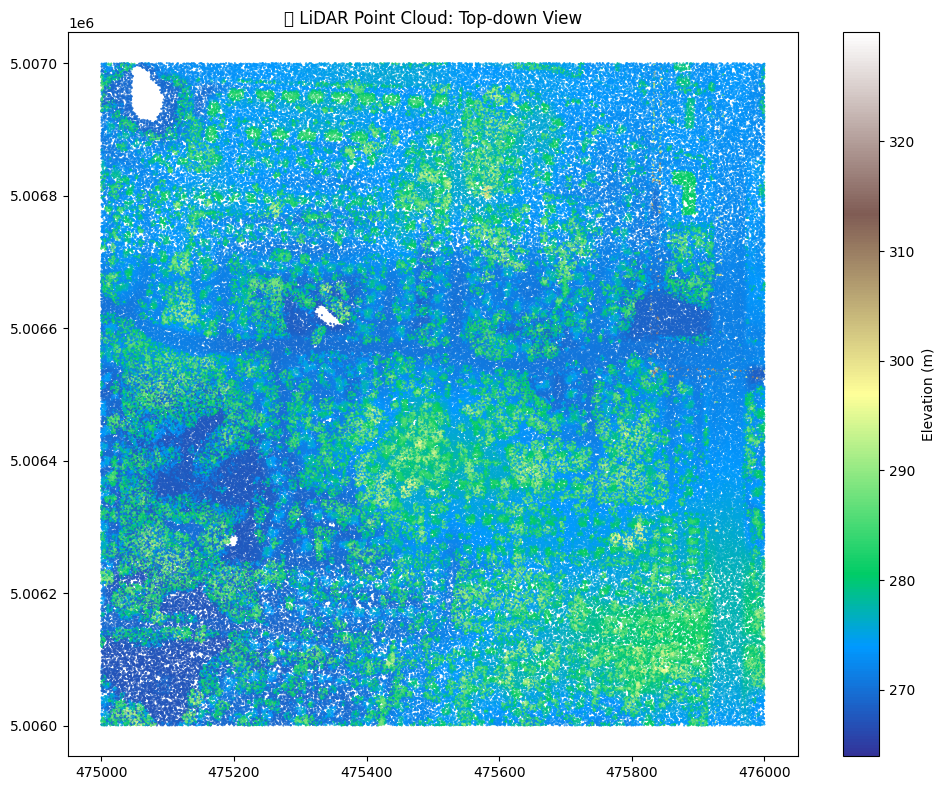

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Extract a subsample (for performance)
max_points = 500_000  # Limit for faster plotting
indices = np.random.choice(len(las.points), size=max_points, replace=False)

x = las.x[indices]
y = las.y[indices]
z = las.z[indices]

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=z, cmap='terrain', s=0.2)
plt.colorbar(label="Elevation (m)")
plt.title("🌍 LiDAR Point Cloud: Top-down View")
plt.axis('equal')
plt.tight_layout()
plt.show()

 1. Load and Visualize the DTM (Bare Earth)

C:\Users\acobe\AppData\Local\Temp\ipykernel_49080\2502286123.py:16: UserWarning: Glyph 129003 (\N{LARGE BROWN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\acobe\Desktop\urban-vegetation-analysis\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129003 (\N{LARGE BROWN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


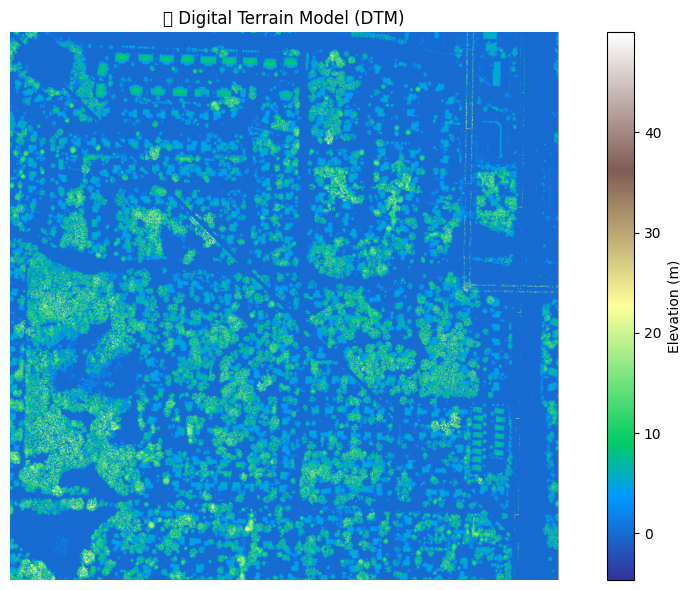

In [21]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load DTM
with rasterio.open("../data/dtm/dtm.tif") as dtm_src:
    dtm = dtm_src.read(1).astype("float32")
    dtm[dtm == dtm_src.nodata] = np.nan

# Plot DTM
plt.figure(figsize=(10, 6))
img = plt.imshow(dtm, cmap="terrain")
plt.title("🟫 Digital Terrain Model (DTM)")
plt.colorbar(img, label="Elevation (m)")
plt.axis("off")
plt.tight_layout()
plt.show()


2. Load and Visualize the DSM (Surface with Trees/Buildings)

C:\Users\acobe\AppData\Local\Temp\ipykernel_49080\1047443337.py:12: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\acobe\Desktop\urban-vegetation-analysis\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


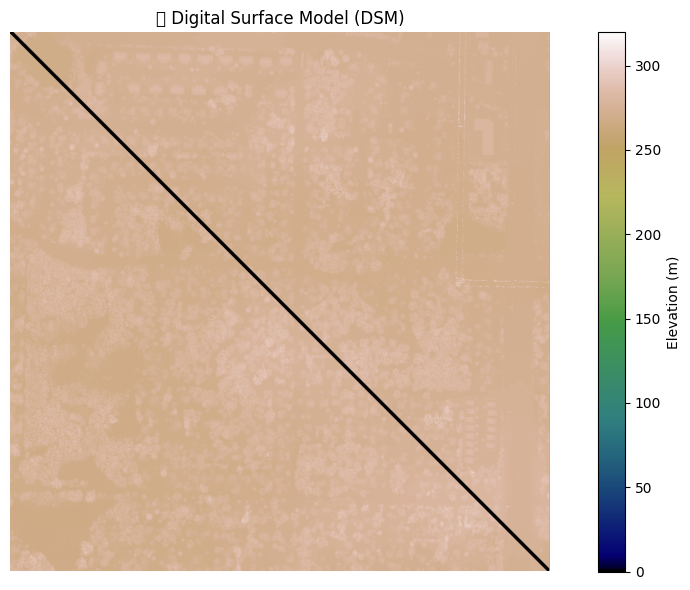

In [22]:
# Load DSM
with rasterio.open("../data/dsm/dsm.tif") as dsm_src:
    dsm = dsm_src.read(1).astype("float32")
    dsm[dsm == dsm_src.nodata] = np.nan

# Plot DSM
plt.figure(figsize=(10, 6))
img = plt.imshow(dsm, cmap="gist_earth")
plt.title("🟩 Digital Surface Model (DSM)")
plt.colorbar(img, label="Elevation (m)")
plt.axis("off")
plt.tight_layout()
plt.show()
